Note méthodologique : preuve de concept

In [1]:
import os

# Configuration du chemin
data_dir = r"C:\Users\HP\Downloads\tiny-imagenet-200"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Vérification des chemins
print("Chemin des données d'entraînement :", train_dir)
print("Chemin des données de validation :", val_dir)


Chemin des données d'entraînement : C:\Users\HP\Downloads\tiny-imagenet-200\train
Chemin des données de validation : C:\Users\HP\Downloads\tiny-imagenet-200\val


In [2]:
# Aperçu des classes dans le dossier train
classes_train = os.listdir(train_dir)
print(f"Nombre de classes dans train : {len(classes_train)}")
print(f"Exemples de classes : {classes_train[:5]}")

# Vérifier le nombre total d'images dans train
total_images_train = sum(len(files) for _, _, files in os.walk(train_dir))
print(f"Nombre total d'images dans train : {total_images_train}")

# Vérifier les fichiers dans le dossier val
files_val = os.listdir(val_dir)
print(f"Fichiers dans val : {files_val[:5]}")


Nombre de classes dans train : 200
Exemples de classes : ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640']
Nombre total d'images dans train : 100200
Fichiers dans val : ['images', 'val_annotations.txt']


In [3]:
val_annotations_path = os.path.join(val_dir, "val_annotations.txt")
if os.path.exists(val_annotations_path):
    print("Le fichier val_annotations.txt est présent.")
else:
    print("Erreur : Le fichier val_annotations.txt est manquant.")


Le fichier val_annotations.txt est présent.


In [19]:
import os
import shutil

# Chemin vers les données Tiny ImageNet
data_dir = r"C:\Users\HP\Downloads\tiny-imagenet-200"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Vérification des dossiers
if os.path.exists(train_dir):
    print("Le dossier train existe.")
else:
    print("Le dossier train est introuvable.")

if os.path.exists(val_dir):
    print("Le dossier val existe.")
else:
    print("Le dossier val est introuvable.")

# Lister quelques classes et fichiers
if os.path.exists(train_dir):
    classes_train = os.listdir(train_dir)
    print(f"Classes dans train : {classes_train[:5]}")

if os.path.exists(val_dir):
    files_val = os.listdir(val_dir)
    print(f"Fichiers dans val : {files_val[:5]}")


Le dossier train existe.
Le dossier val existe.
Classes dans train : ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640']
Fichiers dans val : ['images', 'val_annotations.txt']


In [22]:
import os
import pandas as pd

# Chemin vers les données Tiny ImageNet
data_dir = r"C:\Users\HP\Downloads\tiny-imagenet-200"
train_dir = os.path.join(data_dir, "train")

# Vérifier si le dossier existe
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Le dossier {train_dir} est introuvable.")

# Collecter les chemins d'images et leurs classes
data = []
classes_train = os.listdir(train_dir)

for class_name in classes_train:
    class_dir = os.path.join(train_dir, class_name, "images")
    if os.path.exists(class_dir):
        for image_file in os.listdir(class_dir):
            data.append({"class": class_name, "image_path": os.path.join(class_dir, image_file)})

# Créer un DataFrame
df = pd.DataFrame(data)
print(f"Total d'images collectées : {len(df)}")
print(df.head())


Total d'images collectées : 100000
       class                                         image_path
0  n01443537  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
1  n01443537  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
2  n01443537  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
3  n01443537  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
4  n01443537  C:\Users\HP\Downloads\tiny-imagenet-200\train\...


In [23]:
import random

# Paramètres pour l'échantillon stratifié
NB_CLASSES = 5  # Nombre de classes à inclure
NB_IMAGES_PER_CLASS = 100  # Nombre d'images par classe

# Sélectionner aléatoirement des classes parmi celles disponibles
selected_classes = random.sample(df['class'].unique().tolist(), NB_CLASSES)

# Filtrer le DataFrame pour inclure uniquement les classes sélectionnées
df_sample = df[df['class'].isin(selected_classes)]

# Échantillonner stratifié : choisir un nombre fixe d'images par classe
df_stratified = df_sample.groupby('class').apply(
    lambda x: x.sample(min(len(x), NB_IMAGES_PER_CLASS))
).reset_index(drop=True)

# Afficher un aperçu du DataFrame échantillonné
print(f"Échantillon stratifié : {len(df_stratified)} images")
print(df_stratified.head())



Échantillon stratifié : 500 images
       class                                         image_path
0  n01910747  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
1  n01910747  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
2  n01910747  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
3  n01910747  C:\Users\HP\Downloads\tiny-imagenet-200\train\...
4  n01910747  C:\Users\HP\Downloads\tiny-imagenet-200\train\...


C:\Users\HP\AppData\Local\Temp\ipykernel_8896\4081622208.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_stratified = df_sample.groupby('class').apply(


In [25]:
df_stratified.to_csv('df_stratified.csv', index=False)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 315ms/step - accuracy: 0.2114 - loss: 3.4675 - val_accuracy: 0.2000 - val_loss: 1.7654
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.2023 - loss: 2.3995 - val_accuracy: 0.2000 - val_loss: 2.9651
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.2567 - loss: 2.2516 - val_accuracy: 0.2000 - val_loss: 2.7350
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.2160 - loss: 2.4947 - val_accuracy: 0.2000 - val_loss: 2.0891
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.2106 - loss: 2.6395 - val_accuracy: 0.2000 - val_loss: 3.5760

Évaluation EfficientNet:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

c:\Users\HP\OneDrive\Documents\projet8\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\OneDrive\Documents\projet8\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\OneDrive\Documents\projet8\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 76s 1us/step
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4899 - loss: 1.3583 - val_accuracy: 0.8100 - val_loss: 0.5354
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8927 - loss: 0.3463 - val_accuracy: 0.8600 - val_loss: 0.4594
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9502 - loss: 0.2036 - val_accuracy: 0.8400 - val_loss: 0.4301
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9511 - loss: 0.1556 - val_accuracy: 0.8300 - val_loss: 0.4615
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9831 - loss: 0.0882 - val_accuracy: 0.8700 - val_loss: 0.3879

Évaluation VGG16:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1

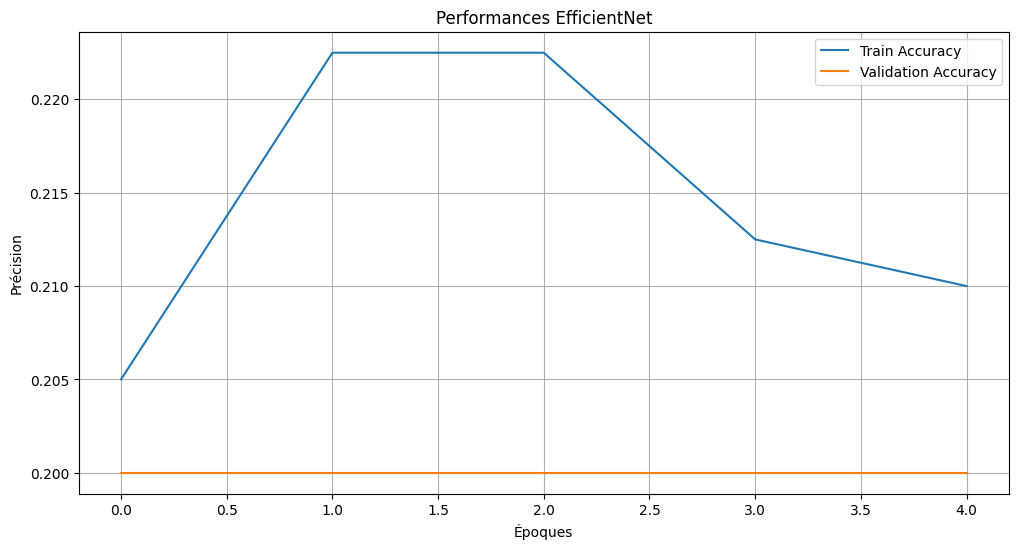

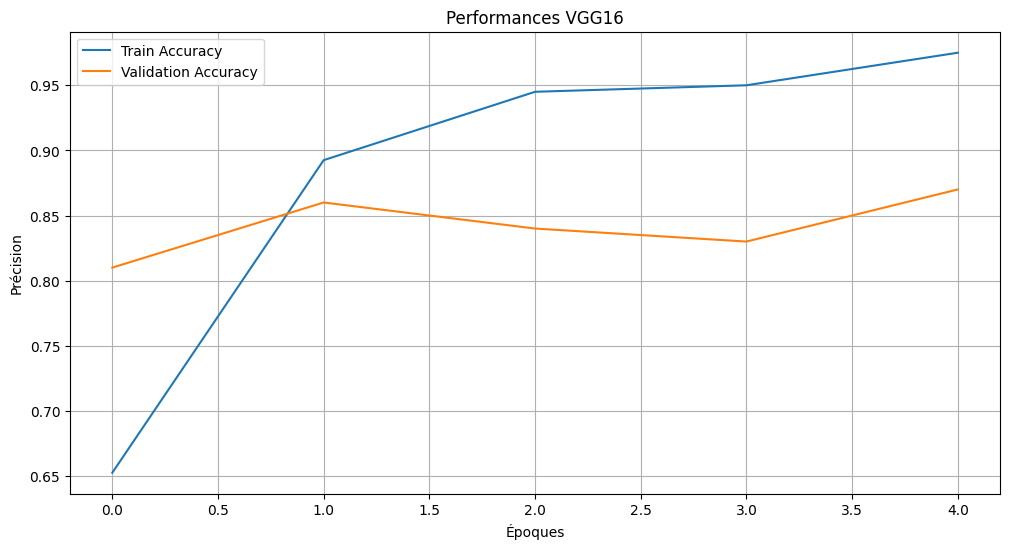


Temps d'entraînement EfficientNet : 77.58 secondes
Temps d'entraînement VGG16 : 298.04 secondes


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import gc
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import train_test_split

# Charger le DataFrame échantillonné
df_stratified = pd.read_csv('df_stratified.csv')

# Configuration
TAILLE_IMG = 128  # Taille des images redimensionnées
TAILLE_BATCH = 8  # Taille du lot
EPOCHS = 5  # Nombre d'époques

# Activer la précision mixte pour réduire l'utilisation de mémoire
set_global_policy('mixed_float16')

# Préparation des chemins d'images et des labels
images = df_stratified['image_path'].tolist()
labels = pd.factorize(df_stratified['class'])[0]  # Conversion des classes en indices numériques

# Division en ensembles d'entraînement et de validation
images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, stratify=labels)

# Fonction pour charger et prétraiter les images
def charger_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (TAILLE_IMG, TAILLE_IMG))
    image = image / 255.0  # Normalisation
    return image, label

# Création des datasets TensorFlow
def creer_dataset(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.map(lambda x, y: charger_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(TAILLE_BATCH).shuffle(1000).prefetch(tf.data.AUTOTUNE)
    return dataset

jeu_train = creer_dataset(images_train, labels_train)
jeu_val = creer_dataset(images_val, labels_val)

# Fonction pour construire et entraîner un modèle
def construire_et_entrainer_modele(fonction_modele_base, jeu_train, jeu_val, nb_classes, epochs=EPOCHS):
    modele_base = fonction_modele_base(include_top=False, weights="imagenet", input_shape=(TAILLE_IMG, TAILLE_IMG, 3))
    modele_base.trainable = False

    x = modele_base.output
    x = GlobalAveragePooling2D()(x) if "EfficientNet" in modele_base.name else Flatten()(x)
    x = Dropout(0.5)(x)
    sorties = Dense(nb_classes, activation="softmax", dtype="float32")(x)

    modele = Model(inputs=modele_base.input, outputs=sorties)
    modele.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    debut_entrainement = time.time()
    historique = modele.fit(jeu_train, validation_data=jeu_val, epochs=epochs)
    temps_ecoule = time.time() - debut_entrainement

    return modele, historique, temps_ecoule

# Fonction pour évaluer un modèle
def evaluer_modele(modele, jeu_val):
    vrais_labels = []
    predits_labels = []

    for images, labels in jeu_val:
        pred = modele.predict(images)
        vrais_labels.extend(labels.numpy())
        predits_labels.extend(np.argmax(pred, axis=1))

    matrice_confusion = confusion_matrix(vrais_labels, predits_labels)
    rapport_classification = classification_report(vrais_labels, predits_labels, target_names=[str(i) for i in range(len(matrice_confusion))])

    return matrice_confusion, rapport_classification

# Entraîner et évaluer EfficientNet
clear_session()
gc.collect()
nb_classes = len(np.unique(labels))
modele_efficientnet, historique_efficientnet, temps_efficientnet = construire_et_entrainer_modele(
    EfficientNetB0, jeu_train, jeu_val, nb_classes
)
print("\nÉvaluation EfficientNet:")
matrice_confusion_efficientnet, rapport_efficientnet = evaluer_modele(modele_efficientnet, jeu_val)
print("Matrice de confusion :\n", matrice_confusion_efficientnet)
print("Rapport de classification :\n", rapport_efficientnet)

# Entraîner et évaluer VGG16
clear_session()
gc.collect()
modele_vgg16, historique_vgg16, temps_vgg16 = construire_et_entrainer_modele(
    VGG16, jeu_train, jeu_val, nb_classes
)
print("\nÉvaluation VGG16:")
matrice_confusion_vgg16, rapport_vgg16 = evaluer_modele(modele_vgg16, jeu_val)
print("Matrice de confusion :\n", matrice_confusion_vgg16)
print("Rapport de classification :\n", rapport_vgg16)

# Visualisation des performances
def tracer_performance(historique, titre):
    plt.figure(figsize=(12, 6))
    plt.plot(historique.history['accuracy'], label='Train Accuracy')
    plt.plot(historique.history['val_accuracy'], label='Validation Accuracy')
    plt.title(titre)
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid()
    plt.show()

tracer_performance(historique_efficientnet, "Performances EfficientNet")
tracer_performance(historique_vgg16, "Performances VGG16")

# Résumé des temps d'entraînement
print(f"\nTemps d'entraînement EfficientNet : {temps_efficientnet:.2f} secondes")
print(f"Temps d'entraînement VGG16 : {temps_vgg16:.2f} secondes")


In [3]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.2031 - loss: 2.5186 - val_accuracy: 0.2000 - val_loss: 2.3149
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.1639 - loss: 2.6411 - val_accuracy: 0.2000 - val_loss: 2.7613
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.1738 - loss: 2.6164 - val_accuracy: 0.2000 - val_loss: 2.4086
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.1925 - loss: 2.4483 - val_accuracy: 0.2000 - val_loss: 1.8889
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.2318 - loss: 2.3196 - val_accuracy: 0.2000 - val_loss: 2.4532


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|██        | 1/5 [00:00<00:01,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 156s 144ms/step


 40%|████      | 2/5 [08:32<15:04, 301.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 167s 155ms/step


 60%|██████    | 3/5 [16:50<13:02, 391.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 153s 149ms/step


 80%|████████  | 4/5 [24:50<07:06, 426.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 151s 146ms/step


100%|██████████| 5/5 [32:55<00:00, 395.02s/it]


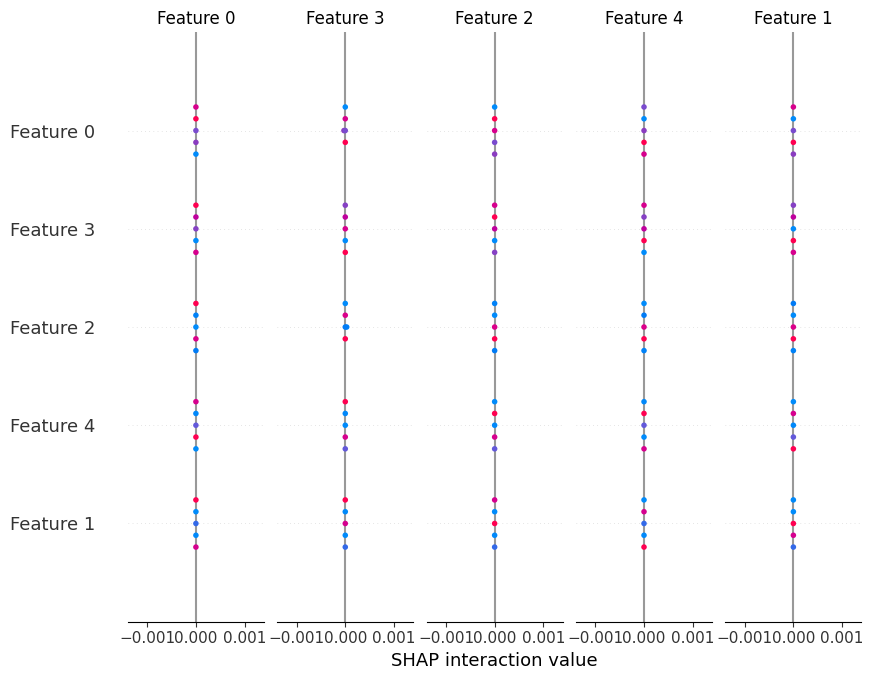

ValueError: Image size of 156225x408 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x400 with 3 Axes>

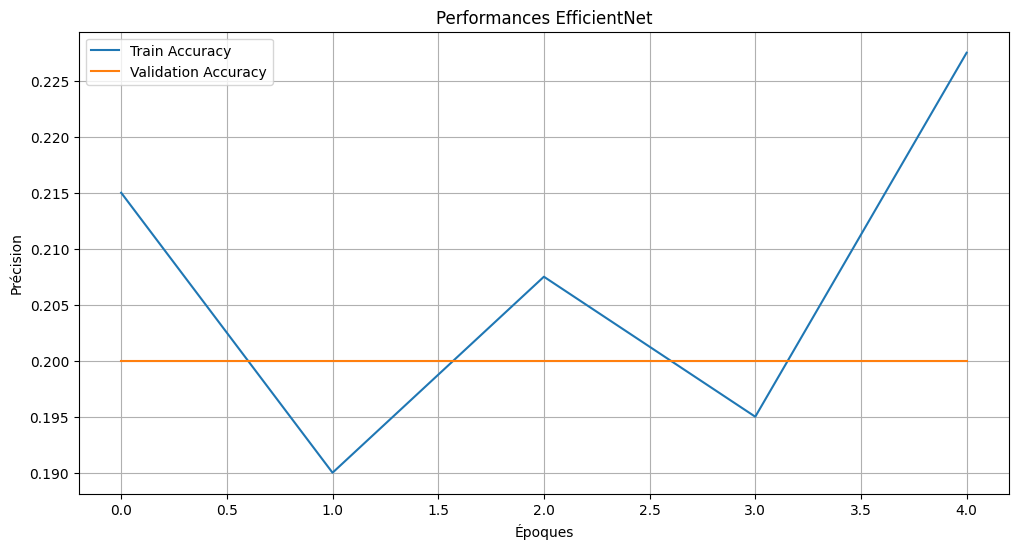


Modèle EfficientNet enregistré dans : saved_models\EfficientNet.h5


In [15]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import shap
import time
import gc
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.backend import clear_session
from sklearn.model_selection import train_test_split

# Charger le DataFrame échantillonné
df_stratified = pd.read_csv('df_stratified.csv')

# Configuration
TAILLE_IMG = 128
TAILLE_BATCH = 8
EPOCHS = 5
MODEL_DIR = "saved_models"  # Répertoire pour enregistrer les modèles
os.makedirs(MODEL_DIR, exist_ok=True)

# Activer la précision mixte pour réduire l'utilisation de mémoire
set_global_policy('mixed_float16')

# Préparation des chemins d'images et des labels
images = df_stratified['image_path'].tolist()
labels = pd.factorize(df_stratified['class'])[0]

# Division en ensembles d'entraînement et de validation
images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, stratify=labels)

# Fonction pour charger et prétraiter les images
def charger_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (TAILLE_IMG, TAILLE_IMG))
    image = image / 255.0  # Normalisation
    return image, label

# Création des datasets TensorFlow
def creer_dataset(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.map(lambda x, y: charger_image(x, y), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(TAILLE_BATCH).shuffle(1000).prefetch(tf.data.AUTOTUNE)
    return dataset

jeu_train = creer_dataset(images_train, labels_train)
jeu_val = creer_dataset(images_val, labels_val)

# Fonction pour construire et entraîner un modèle
def construire_et_entrainer_modele(fonction_modele_base, jeu_train, jeu_val, nb_classes, model_name, epochs=EPOCHS):
    modele_base = fonction_modele_base(include_top=False, weights="imagenet", input_shape=(TAILLE_IMG, TAILLE_IMG, 3))
    modele_base.trainable = False

    x = modele_base.output
    x = GlobalAveragePooling2D()(x) if "EfficientNet" in modele_base.name else Flatten()(x)
    x = Dropout(0.5)(x)
    sorties = Dense(nb_classes, activation="softmax", dtype="float32")(x)

    modele = Model(inputs=modele_base.input, outputs=sorties)
    modele.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    historique = modele.fit(jeu_train, validation_data=jeu_val, epochs=epochs)
    modele.save(os.path.join(MODEL_DIR, f"{model_name}.h5"))  # Sauvegarde du modèle

    return modele, historique

# Entraîner et enregistrer EfficientNet
clear_session()
gc.collect()
nb_classes = len(np.unique(labels))
modele_efficientnet, historique_efficientnet = construire_et_entrainer_modele(
    EfficientNetB0, jeu_train, jeu_val, nb_classes, "EfficientNet"
)

# Analyse de l'importance des features avec SHAP
def analyse_shap(modele, jeu_val):
    # Extraire un batch d'images et de labels
    batch = next(iter(jeu_val))
    images, labels = batch
    images_np = images.numpy()  # Conversion en NumPy
    
    # Aplatir les images pour SHAP
    images_flat = images_np.reshape(images_np.shape[0], -1)

    # Fonction prédictive pour SHAP
def analyse_shap(modele, jeu_val):
    # Extraire un batch d'images et de labels
    batch = next(iter(jeu_val))
    images, labels = batch
    images_np = images.numpy()  # Conversion en NumPy

    # Réduire la taille des images pour SHAP (par exemple, 32x32)
    images_reduced = tf.image.resize(images, (32, 32)).numpy()
    images_flat = images_reduced.reshape(images_reduced.shape[0], -1)

    # Fonction prédictive pour SHAP
    def pred_fn(data):
        # Reformater les données pour le modèle
        data_reshaped = data.reshape(-1, 32, 32, 3)
        data_resized = tf.image.resize(data_reshaped, (TAILLE_IMG, TAILLE_IMG)).numpy()
        return modele.predict(data_resized, batch_size=TAILLE_BATCH)

    # Limiter le nombre d'images analysées
    images_to_analyze = images_flat[:5]

    # Utiliser KernelExplainer avec un échantillon de référence
    explainer = shap.KernelExplainer(pred_fn, images_flat[:1])  # Une seule image comme référence
    shap_values = explainer.shap_values(images_to_analyze)

    # Importance globale
    shap.summary_plot(shap_values, images_to_analyze)

    # Importance locale (Waterfall plot)
    shap.waterfall_plot(
        shap.Explanation(values=shap_values[0][0], 
                         base_values=explainer.expected_value[0], 
                         data=images_to_analyze[0])
    )




# Analyse SHAP pour EfficientNet
analyse_shap(modele_efficientnet, jeu_val)

# Résumé des performances
def tracer_performance(historique, titre):
    plt.figure(figsize=(12, 6))
    plt.plot(historique.history['accuracy'], label='Train Accuracy')
    plt.plot(historique.history['val_accuracy'], label='Validation Accuracy')
    plt.title(titre)
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid()
    plt.show()

tracer_performance(historique_efficientnet, "Performances EfficientNet")

print("\nModèle EfficientNet enregistré dans :", os.path.join(MODEL_DIR, "EfficientNet.h5"))
